Import the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import numpy as np


Import the dataset and demonstrate like a table form.

In [2]:
combined_wine = pd.read_csv("datasets/wineanalysis.csv")
combined_wine

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6493,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6494,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6495,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,6496,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Learn the dataset and get information from them.

In [3]:
combined_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed.acidity         6497 non-null   float64
 2   volatile.acidity      6497 non-null   float64
 3   citric.acid           6497 non-null   float64
 4   residual.sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free.sulfur.dioxide   6497 non-null   float64
 7   total.sulfur.dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  type                  6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [4]:
combined_wine.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,3249.000000,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1875.666681,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1625.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,4873.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,6497.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
combined_wine["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

Dataset have incorrect values in the data. "#NUM!" where locate.

In [6]:
combined_wine[combined_wine["type"] == "#NUM!"]

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type


Delete the rows with the incorrect values

In [7]:
combined_wine = combined_wine[combined_wine["type"] != "#NUM!"]

Demonstrating the histogram with distribution of values.

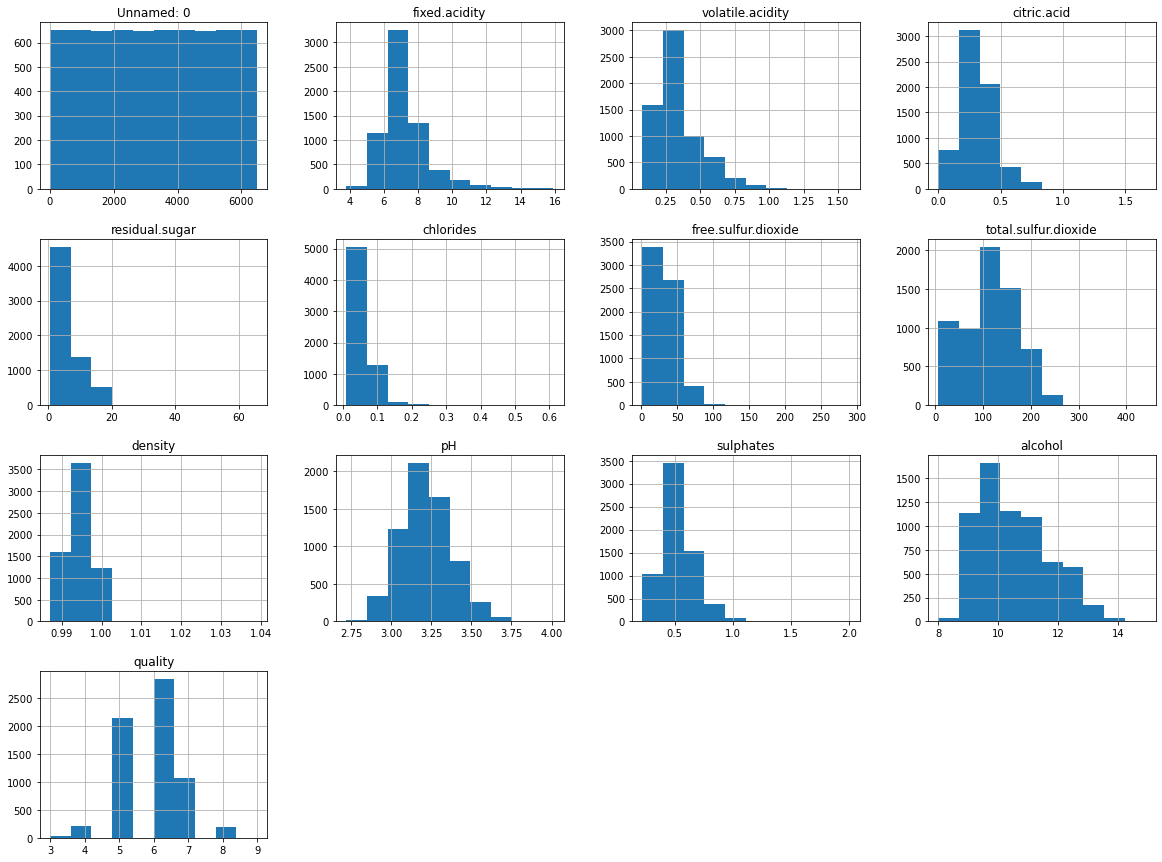

In [8]:
combined_wine.hist(figsize=(20, 15))
plt.show()

Demonstrating the correlations between dataset columns.

array([[<AxesSubplot:xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='fixed.acidity', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='volatile.acidity', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='citric.acid', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='residual.sugar', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='chlorides', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='free.sulfur.dioxide', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='total.sulfur.dioxide', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='density', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='pH', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='sulphates', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='alcohol', ylabel='Unnamed: 0'>,
        <AxesSubplot:xlabel='quality', ylabel='Unnamed: 0'>],
       [<AxesSubplot:xlabel='Unnamed: 0', ylabel='fixed.acidity'>,
        <AxesSubplot:xlabel='fixed.acidity', ylabel='fixed.acidity'>,
        <AxesSub

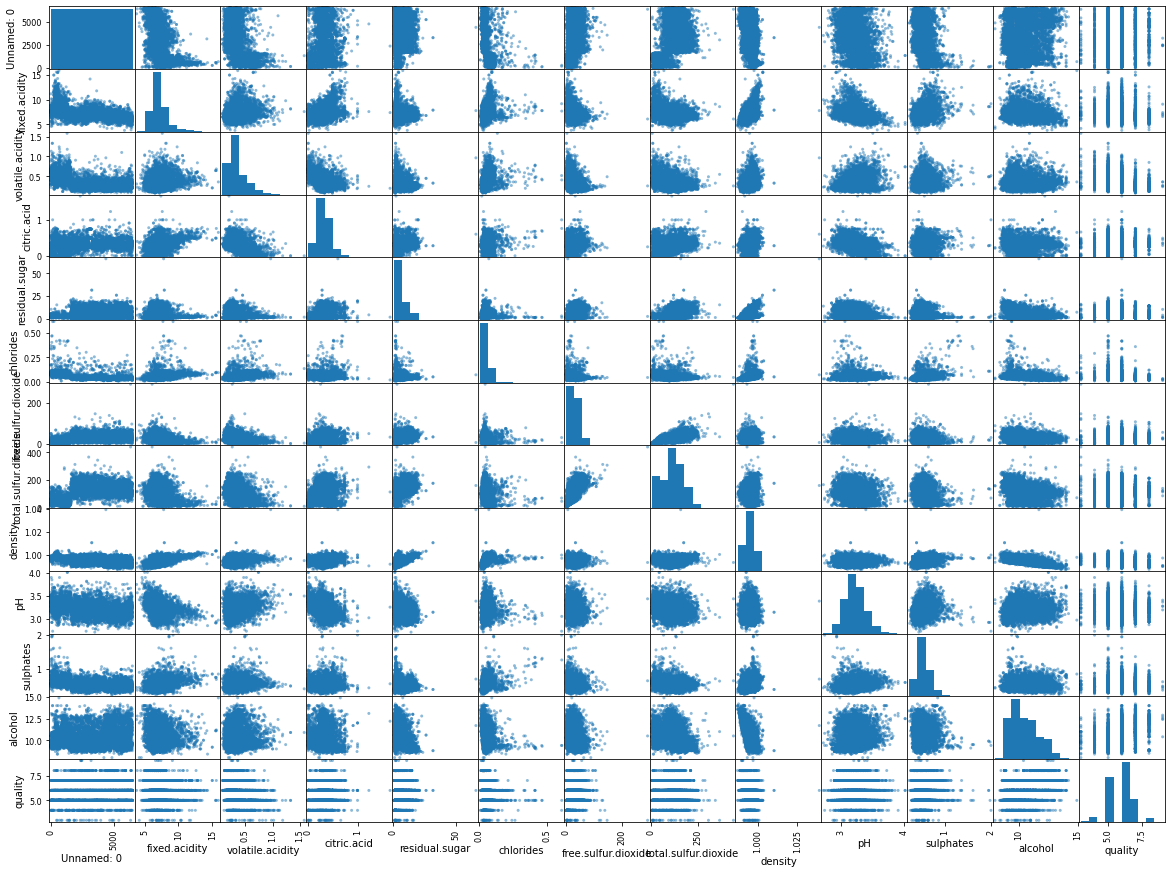

In [10]:
scatter_matrix(combined_wine, figsize=(20, 15))

Split the columns with parameters from the column by which the classification do it and get to ready train and test form.

In [11]:
X = combined_wine.drop(labels=["type"], axis=1)
y = combined_wine["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

Realization the linear classifier.

In [12]:
sgdc = SGDClassifier()
sgdc.fit(X=X_train, y=y_train)

SGDClassifier()

Save the values of quality metrics to the dictionary, test with linear classifier.

In [13]:
y_pred = sgdc.predict(X=X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))
sgdc_report_dict = classification_report(
 y_true=y_test, y_pred=y_pred, output_dict=True
)

              precision    recall  f1-score   support

         red       0.99      0.97      0.98       400
       white       0.99      1.00      0.99      1225

    accuracy                           0.99      1625
   macro avg       0.99      0.98      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Realization the support vector machine

In [14]:
lsvc = LinearSVC()
lsvc.fit(X=X_train, y=y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

Save the resuls of quality metrics and test with support vector machine.

In [15]:
y_pred = lsvc.predict(X=X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))
lsvc_report_dict = classification_report(
 y_true=y_test, y_pred=y_pred, output_dict=True
)

              precision    recall  f1-score   support

         red       0.98      0.99      0.99       400
       white       1.00      0.99      1.00      1225

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



Realization the DecisionTree classifier.

In [16]:
dtc = DecisionTreeClassifier()
dtc.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

Save the resuls of quality metrics and test with DecisionTreeClassifier

In [17]:
y_pred = dtc.predict(X=X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))
dtc_report_dict = classification_report(
 y_true=y_test, y_pred=y_pred, output_dict=True
)

              precision    recall  f1-score   support

         red       1.00      0.99      1.00       400
       white       1.00      1.00      1.00      1225

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Checking with one of the model

In [18]:
sgdc_report_dict

{'red': {'precision': 0.9948586118251928,
  'recall': 0.9675,
  'f1-score': 0.9809885931558935,
  'support': 400},
 'white': {'precision': 0.9894822006472492,
  'recall': 0.9983673469387755,
  'f1-score': 0.9939049167005283,
  'support': 1225},
 'accuracy': 0.9907692307692307,
 'macro avg': {'precision': 0.992170406236221,
  'recall': 0.9829336734693878,
  'f1-score': 0.9874467549282109,
  'support': 1625},
 'weighted avg': {'precision': 0.9908056249372046,
  'recall': 0.9907692307692307,
  'f1-score': 0.9907255139818489,
  'support': 1625}}

Demonstrate comparison between them.

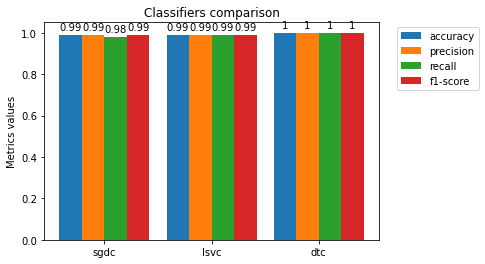

In [19]:
classifiers = ["sgdc", "lsvc", "dtc"]
accuracies = [
 round(sgdc_report_dict["accuracy"], 2),
 round(lsvc_report_dict["accuracy"], 2),
 round(dtc_report_dict["accuracy"], 2),
]
precisions = [
 round(sgdc_report_dict["macro avg"]["precision"], 2),
 round(lsvc_report_dict["macro avg"]["precision"], 2),
 round(dtc_report_dict["macro avg"]["precision"], 2),
]
recalls = [
 round(sgdc_report_dict["macro avg"]["recall"], 2),
 round(lsvc_report_dict["macro avg"]["recall"], 2), 
 round(dtc_report_dict["macro avg"]["recall"], 2),
]
f1_scores = [
 round(sgdc_report_dict["macro avg"]["f1-score"], 2),
 round(lsvc_report_dict["macro avg"]["f1-score"], 2),
 round(dtc_report_dict["macro avg"]["f1-score"], 2),
]
x = np.arange(len(classifiers))
width = 0.21
fig, ax = plt.subplots()
bar1 = ax.bar(x - width * 1.5, accuracies, width, label="accuracy")
bar2 = ax.bar(x - width / 2, precisions, width, label="precision")
bar3 = ax.bar(x + width / 2, recalls, width, label="recall")
bar4 = ax.bar(x + width * 1.5, f1_scores, width, label="f1-score")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title("Classifiers comparison")
ax.set_ylabel("Metrics values")
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)
ax.bar_label(bar3, padding=3)
ax.bar_label(bar4, padding=3)
# fig.tight_
plt.show()

For the dataset, models were trained using a linear classifier, the support vector machine and a decision tree. The model trained using the decision tree showed the best quality. This can be demonstrate by the fact that the decision tree method works well with numerical data.